In [45]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

import src.data.process_data

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))

# Load dataframes

In [3]:
df_movies = pd.read_csv('data/processed/movies.csv')
df_movies.head()

,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [5]:
df_characters = pd.read_csv('data/processed/characters.csv')
df_characters.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor DoB,Actor gender,Actor height (m),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [7]:
df_plots = pd.read_csv('data/processed/plot_summaries.csv')
df_plots.head()

,Wikipedia movie ID,Summary
0,31186339,The nation of Panem consists of a wealthy Capi...
1,20663735,Poovalli Induchoodan is sentenced for six yea...
2,2231378,"The Lemon Drop Kid , a New York City swindler,..."
3,595909,Seventh-day Adventist Church pastor Michael Ch...
4,5272176,The president is on his way to give a speech. ...


In [9]:
# merge movie metadata and plots 
df_movies_summaries = pd.merge(df_movies, df_plots, on='Wikipedia movie ID')
df_movies_summaries.head()

,Wikipedia movie ID,Freebase ID,Movie name,Release date,Box office revenue,Runtime,Languages,Countries,Genres,Summary
0,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
1,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
2,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
3,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."
4,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...


# Preprocessing - Data Distributions 

In [115]:
from src.data.process_data import *

## Movies 
### Languages

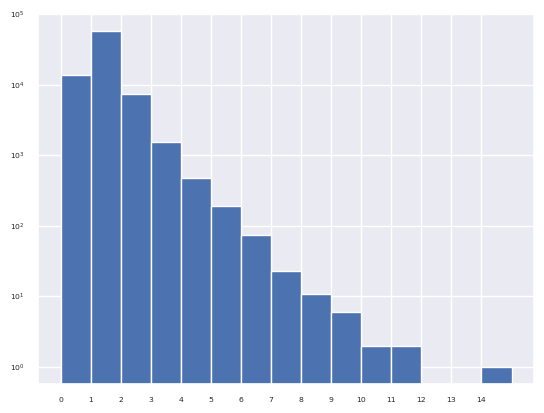

In [82]:
# Distribution of number of languages 
df_movies["Lang names"] = df_movies["Languages"].apply(extract_tuples_values)
plt.hist(df_movies["Lang names"].apply(len), log=True, bins=15)
plt.xticks(range(0, 15))
plt.show()

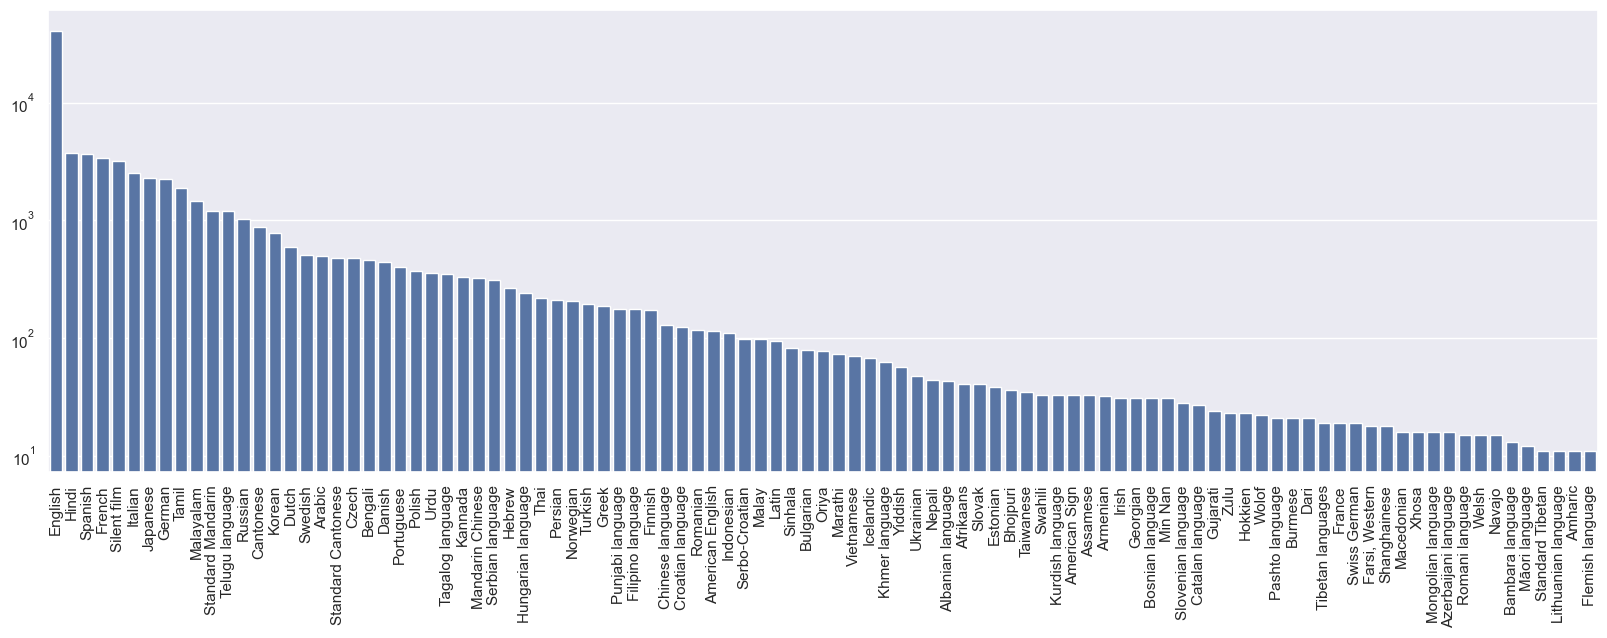

In [92]:
from collections import Counter
all_langs = df_movies["Lang names"].explode().tolist()

lang_frequencies = {str(k).strip().replace(" Language", "") : v for k, v in Counter(all_langs).items() if v > 10}

sorted_langs = sorted(lang_frequencies.items(), key=lambda x: x[1], reverse=True)
langs, freqs = zip(*sorted_langs)

plt.figure(figsize=(20, 6))
plt.tight_layout()
sns.barplot(x=langs, y=freqs, log=True)
plt.xticks(rotation=90)
plt.show()

/opt/homebrew/anaconda3/envs/ada/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 66582 (\N{DESERET CAPITAL LETTER JEE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ada/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 66610 (\N{DESERET SMALL LETTER SHORT O}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ada/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 66633 (\N{DESERET SMALL LETTER ER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ada/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 66635 (\N{DESERET SMALL LETTER EM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ada/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 666

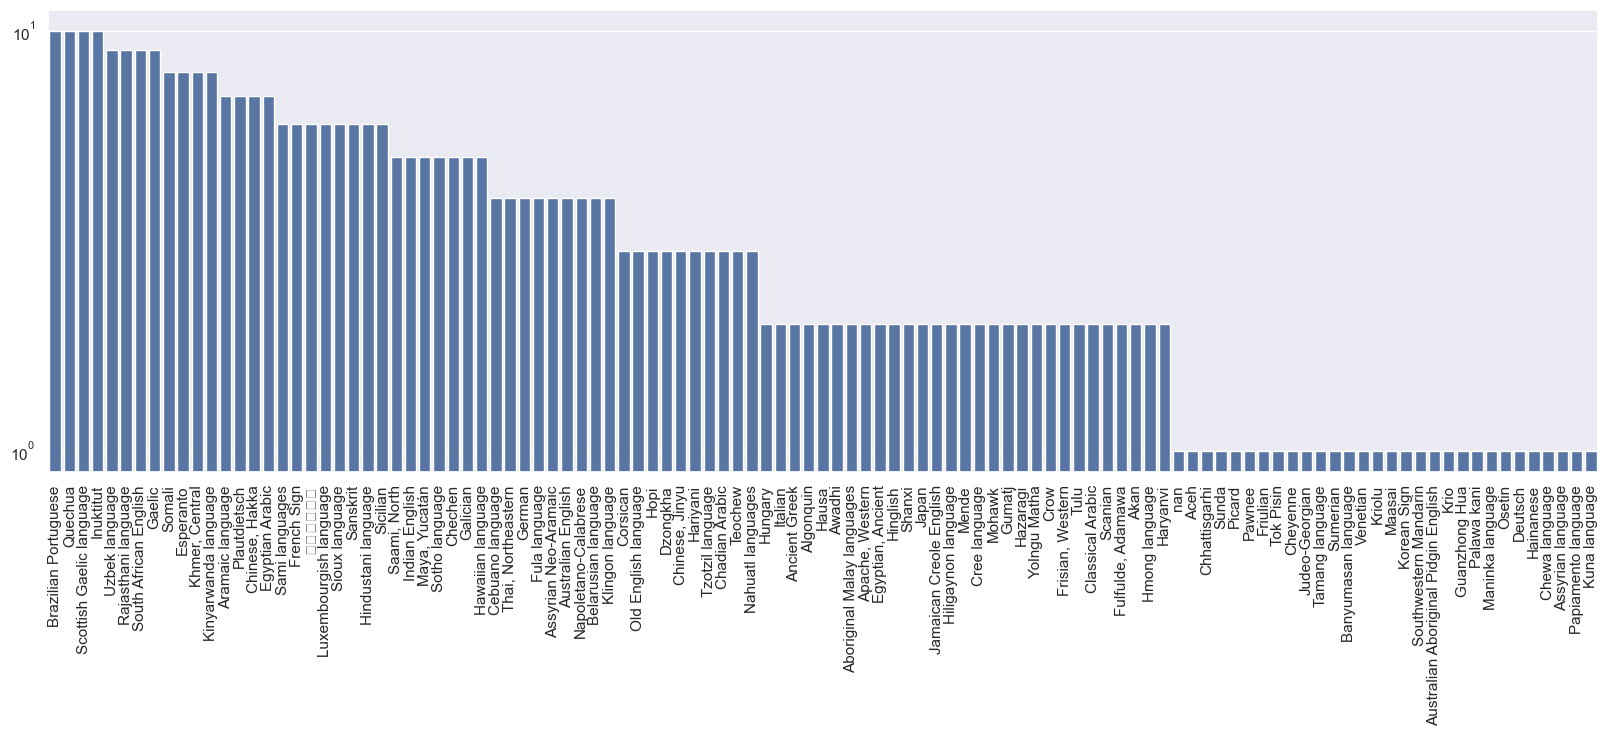

In [91]:
all_langs = df_movies["Lang names"].explode().tolist()

lang_frequencies = {str(k).strip().replace(" Language", "") : v for k, v in Counter(all_langs).items() if v <= 10}

sorted_langs = sorted(lang_frequencies.items(), key=lambda x: x[1], reverse=True)
langs, freqs = zip(*sorted_langs)

plt.figure(figsize=(20, 6))
plt.tight_layout()
sns.barplot(x=langs, y=freqs, log=True)
plt.xticks(rotation=90)
plt.show()

Things to fix: 
- English, American English, Australian English
- Remove " Language" and " language"
- French & France, Japan & Japanese, German & Deutsch
- Remove nan
- German & Italian appearing twice
- Chinese, Standard Mandarin, Mandarin, Mandarin Chinese, Cantonese, Standard Contonese 
- Scottish Gaelic vs Gaelic 

### Genres
oih

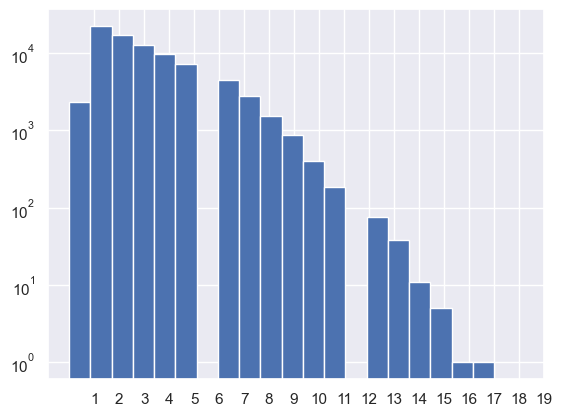

In [98]:
# Distribution of number of languages 
df_movies["Genre names"] = df_movies["Genres"].apply(extract_tuples_values)
plt.hist(df_movies["Genre names"].apply(len), log=True, bins=20)
plt.xticks(range(1, 20))
plt.show()

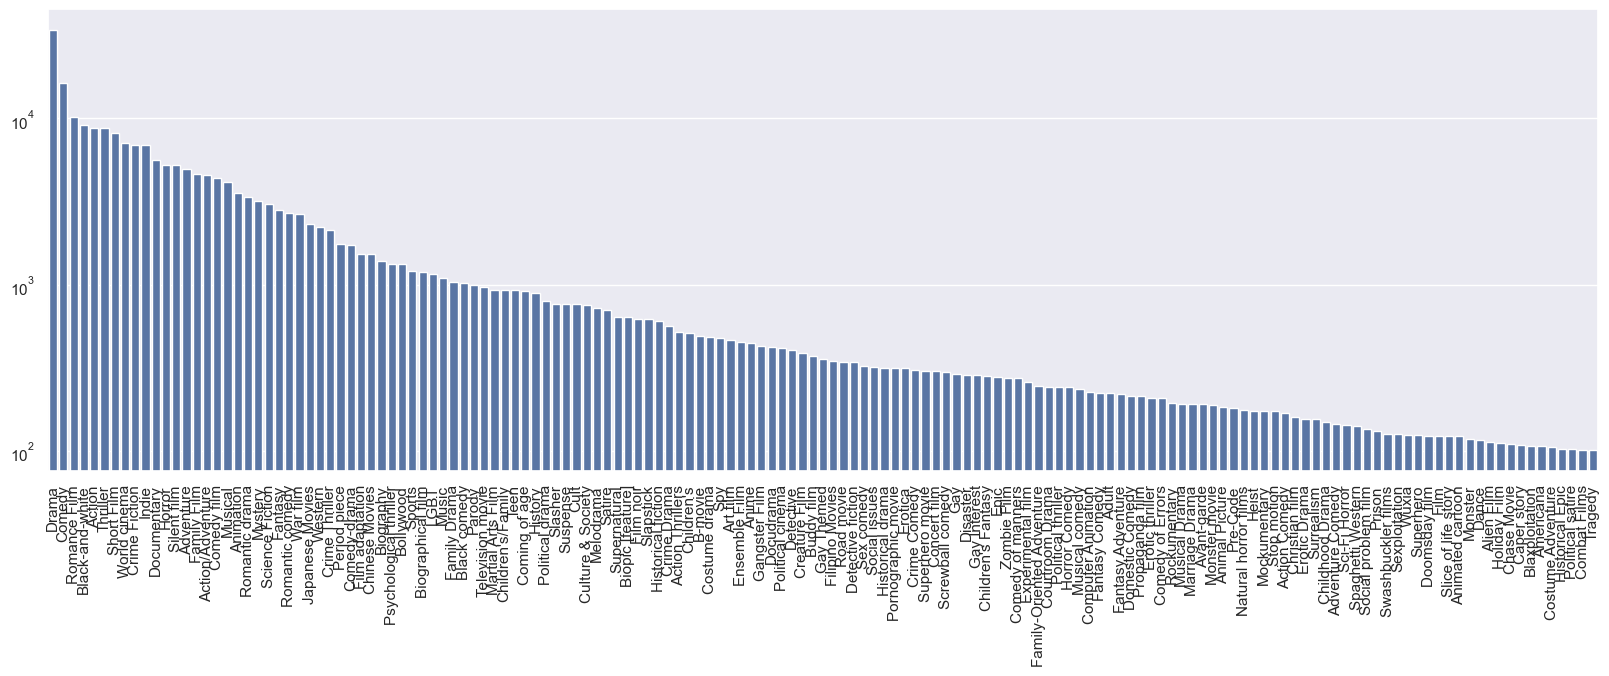

In [106]:

all_genres = df_movies["Genre names"].explode().tolist()

genres, freqs = get_sorted_counts(df_movies["Genre names"].explode().tolist(), 100)
plt.figure(figsize=(20, 6))
plt.tight_layout()
sns.barplot(x=genres, y=freqs, log=True)
plt.xticks(rotation=90)
plt.show()

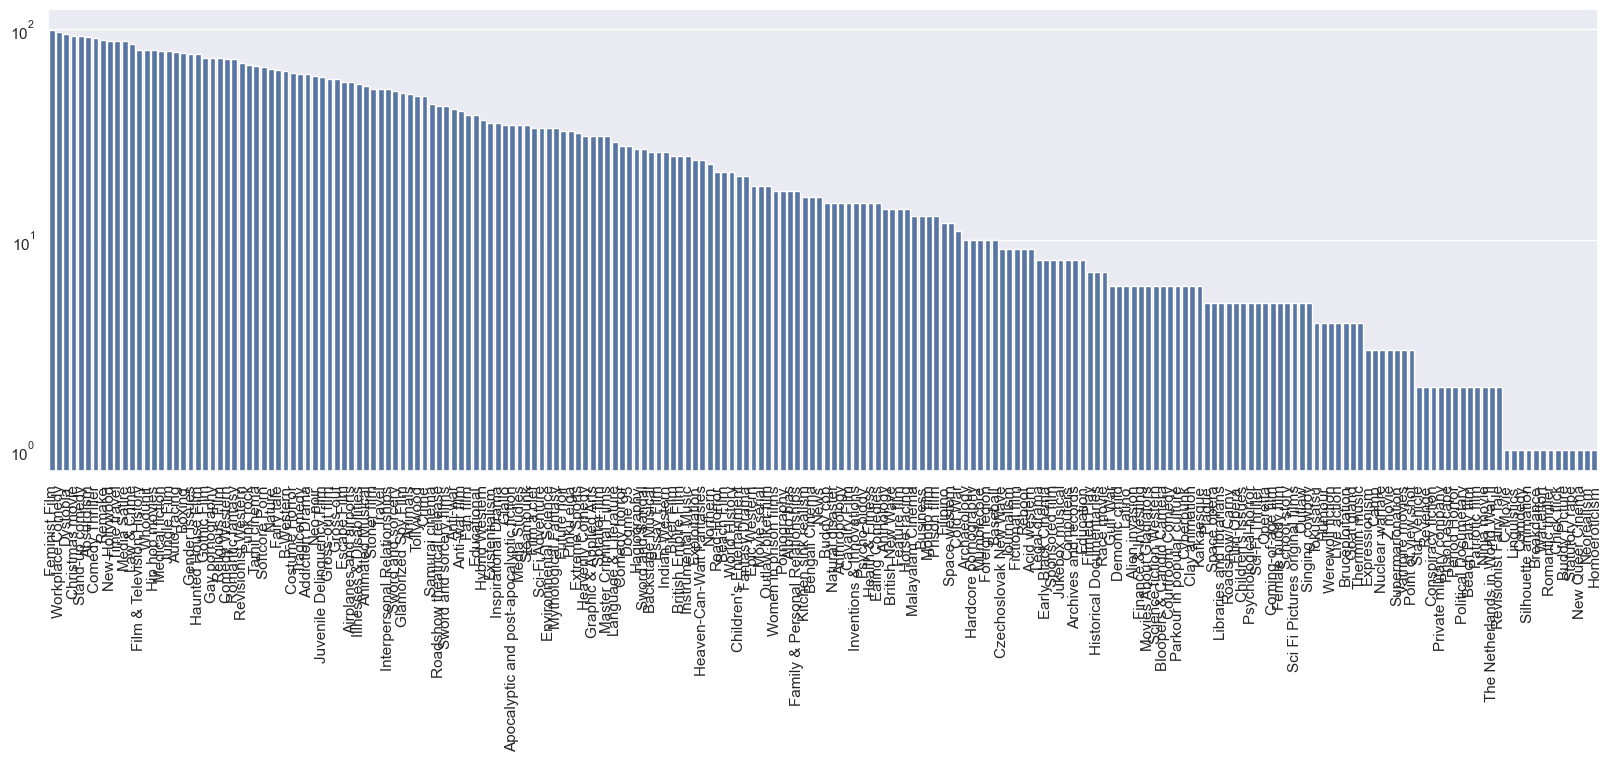

In [123]:
genres, freqs = get_sorted_counts(df_movies["Genre names"].explode().tolist(), 100, False)

plt.figure(figsize=(20, 6))
plt.tight_layout()
sns.barplot(x=genres, y=freqs, log=True)
plt.xticks(rotation=90)
plt.show()

To fix: 
- Remove "film" or "Film" at the end
- Some genres are mixed e.g. "Comedy-drama" - should divide into 2 different gernes 

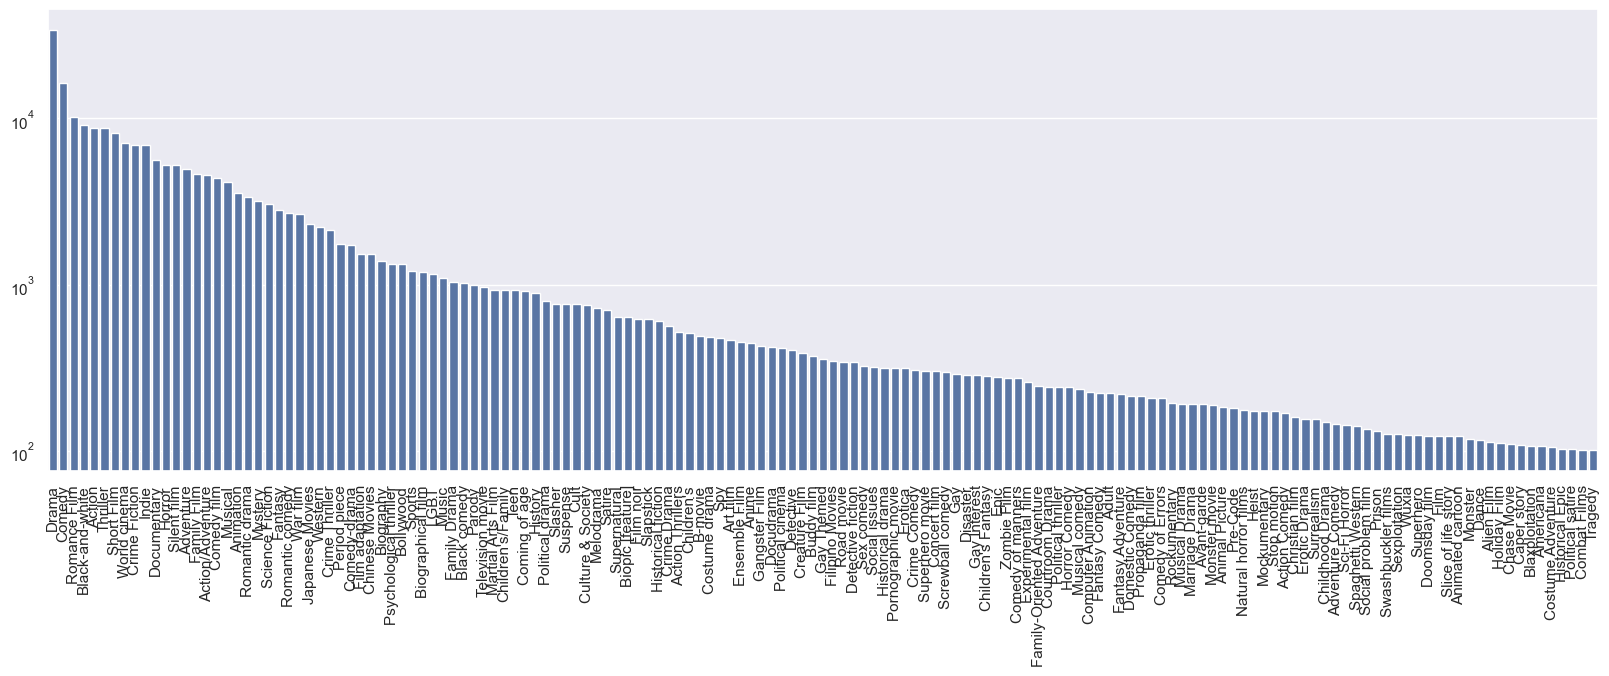

In [121]:
genres, freq = get_sorted_counts(df_movies["Genre names"].explode().tolist(), 100)
plt.figure(figsize=(20, 6))
plt.tight_layout()
sns.barplot(x=genres, y=freq, log=True)
plt.xticks(rotation=90)
plt.show()



### Release dates
### Runtimes 
### Box office revenues
### Countries 
## Actors 
### Gender
### Ages (DoB and age during movie) 
### Ethnicity 
### Height?

# Preprocessing - Cleaning 